In [107]:
#import libraries
import numpy as np  
import pandas as pd # 
import seaborn as sns
import matplotlib.pyplot as plt
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import os

In [108]:
data_np=np.load("olivetti_faces.npy")
target_np=np.load("olivetti_faces_target.npy")

In [109]:
#check number of images in the dataset
print(f"Images in the dataset {len(data_np)}")
print(f"The unique targets in the dataset {len(np.unique(target_np))}")
print(f"Size of each image is {data_np.shape[1]*data_np.shape[2]}")
print(f"Pixel values were scaled to [0,1] interval. e.g:{data_np[0][0,:4]}")

Images in the dataset 400
The unique targets in the dataset 40
Size of each image is 4096
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [110]:
print(f"The unique target number: {np.unique(target_np)}")

The unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [111]:
import matplotlib.pyplot as plt

def show_images(images, ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr = axarr.flatten()

    for i, id in enumerate(ids):
        i_index = id * 10
        axarr[i].imshow(images[i_index], cmap='viridis')  
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title("Face ID: {}".format(id))

    plt.suptitle("There are 40 distinct people in the dataset")
    plt.show()


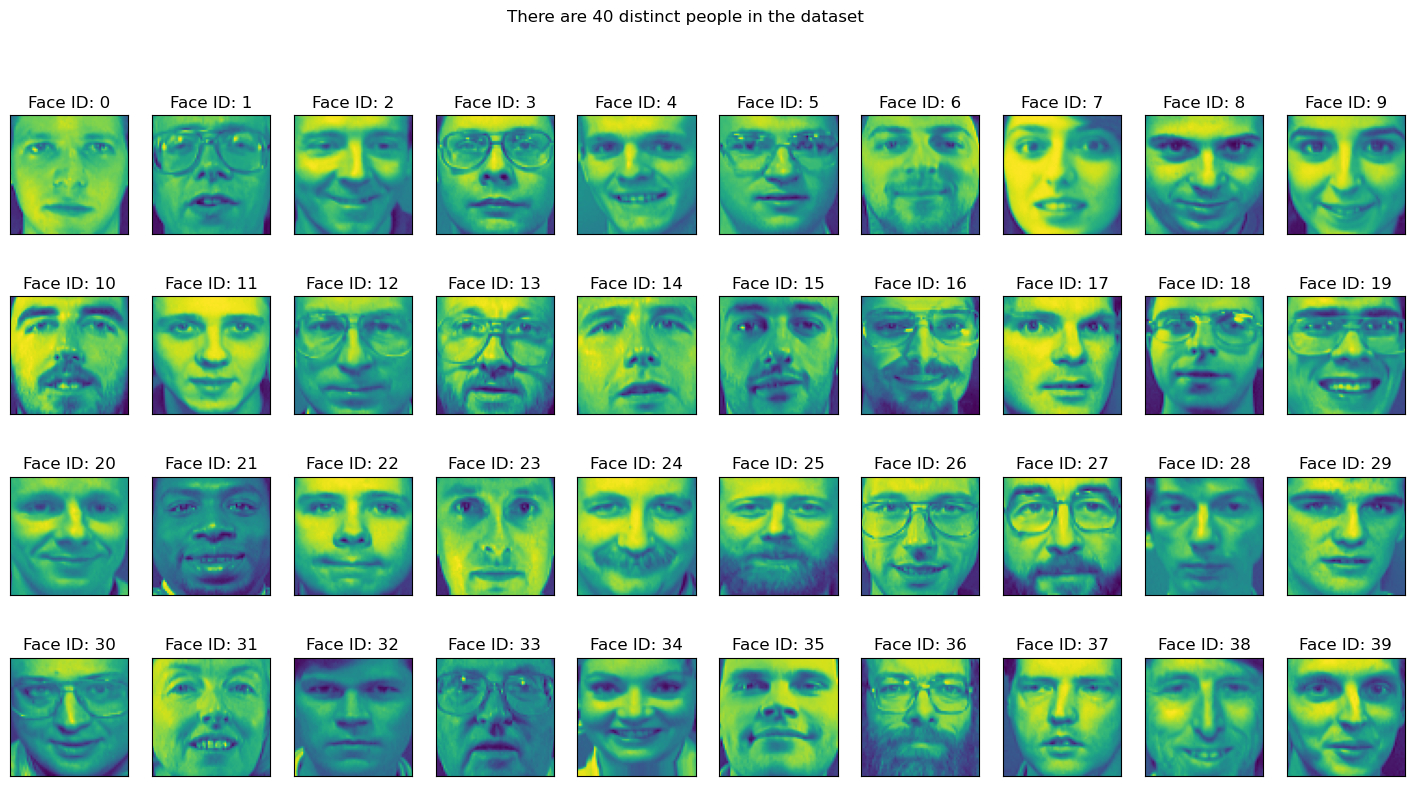

In [112]:
show_images(data_np, np.unique(target_np))

<a class="anchor" id="2.2.">

In [113]:
def show_10_faces(images, ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    
    for i, _id in enumerate(ids):
        for j in range(cols):
            i_index=_id*10 + j
            axarr[i,j].imshow(images[i_index], cmap="copper")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title(f"face id:{(_id)}")
    

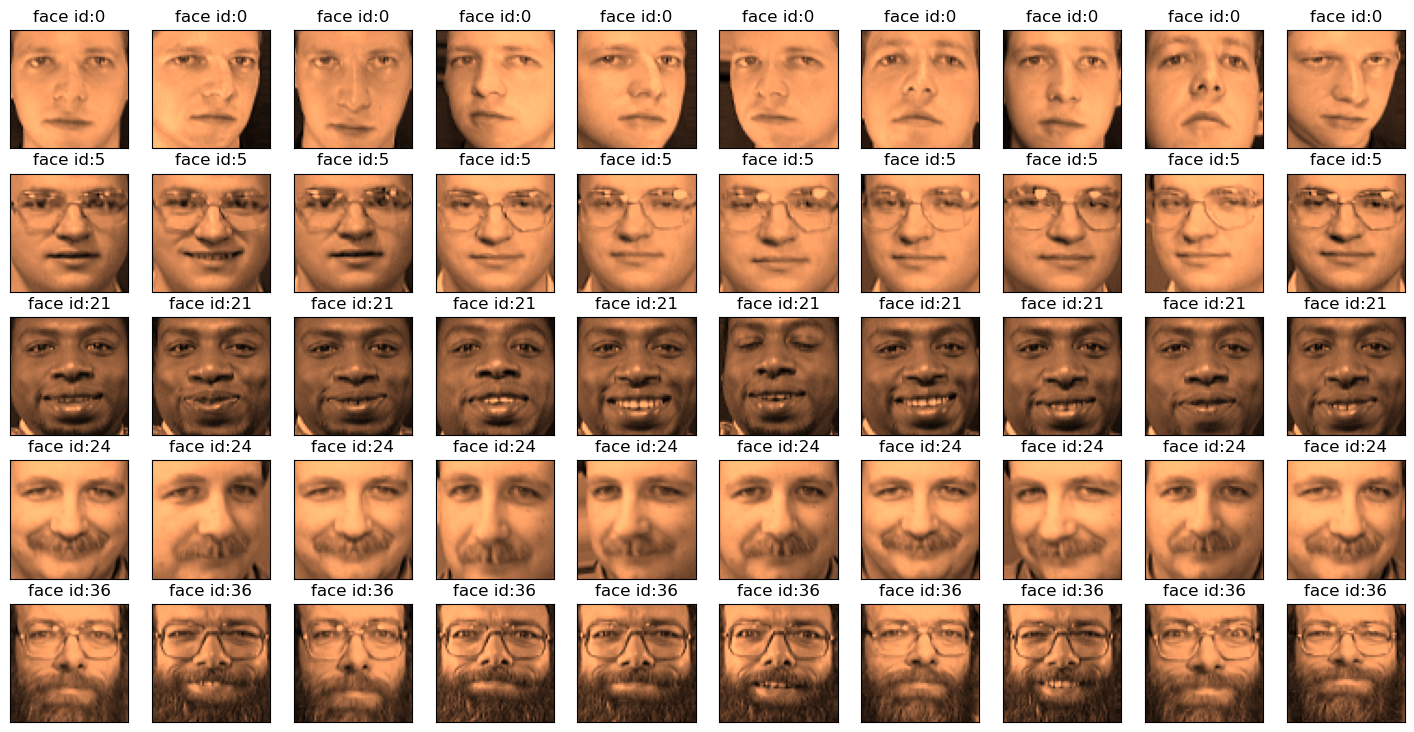

In [114]:
#You can playaround subject_ids to see other people faces
show_10_faces(images=data_np, ids=[0,5, 21, 24, 36])

In [115]:
#reshape images for machine learnig  model
X=data_np.reshape((data_np.shape[0],data_np.shape[1]*data_np.shape[2]))
X.shape

(400, 4096)

In [116]:
#train test spliting
X_train, X_test, y_train, y_test=train_test_split(X, target_np, test_size=0.3, stratify=target_np, random_state=0)
X_train.shape


(280, 4096)

In [117]:
y_train.shape

(280,)

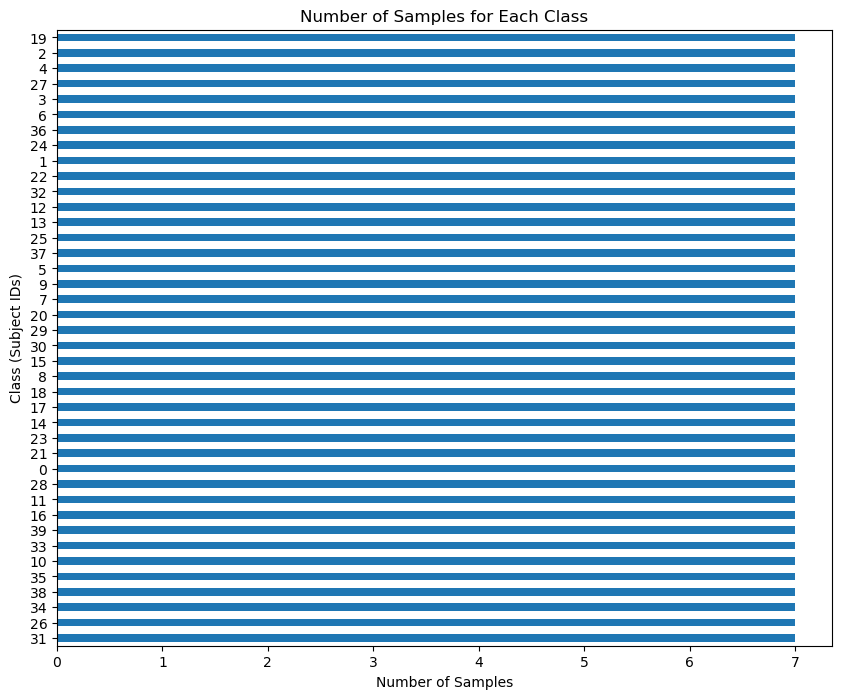

In [118]:
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
class_counts = y_frame['subject ids'].value_counts()

plt.figure(figsize=(10, 8))
class_counts.plot(kind='barh')
plt.xlabel("Number of Samples")
plt.ylabel("Class (Subject IDs)")
plt.title("Number of Samples for Each Class")
plt.show()


In [119]:
#data reduction using pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

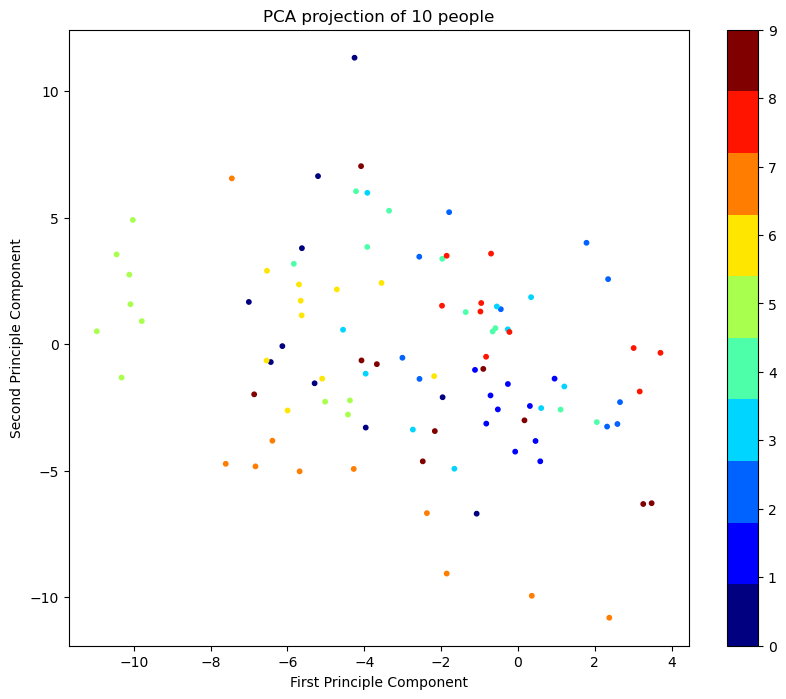

In [120]:
n=10
i_range=n*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:i_range,0],
            X_pca[:i_range,1], 
            c=target_np[:i_range],
            s=10,
           cmap=plt.get_cmap('jet', n)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(n))

fig.colorbar(scatter)

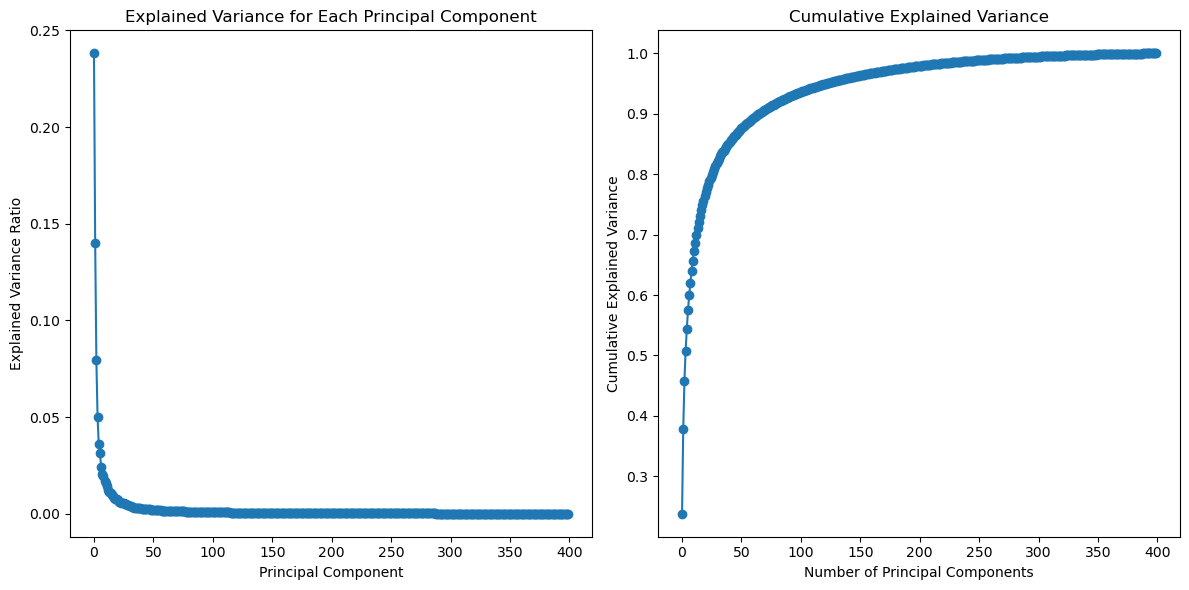

In [121]:
#get the optimum Number of Principle Component
pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 6))

# Plot explained variances for individual components
plt.subplot(121)
plt.plot(explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')

# Plot cumulative explained variance
plt.subplot(122)
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


In [122]:
#classify images using 100 images
components=100

In [123]:
pca=PCA(n_components=components, whiten=True)
pca.fit(X_train)

PCA(n_components=100, whiten=True)

Text(0.5, 1.0, 'Average Face')

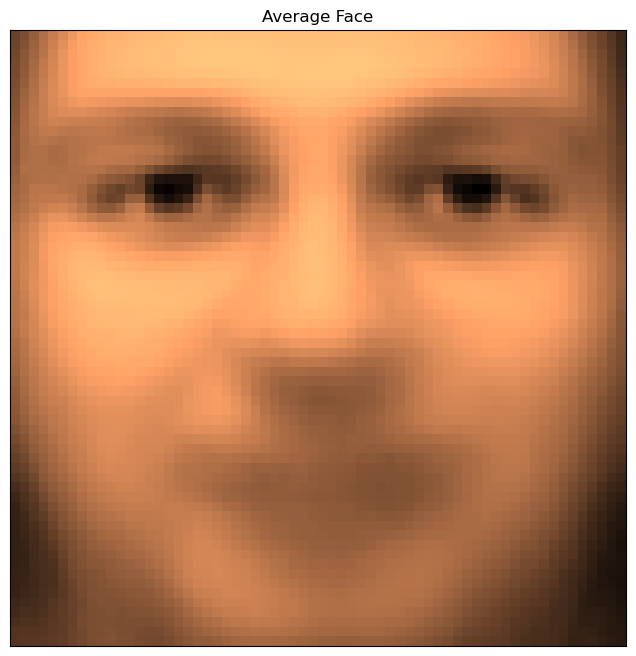

In [124]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="copper")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, "All Eigen Faces ('**********', '**********')")

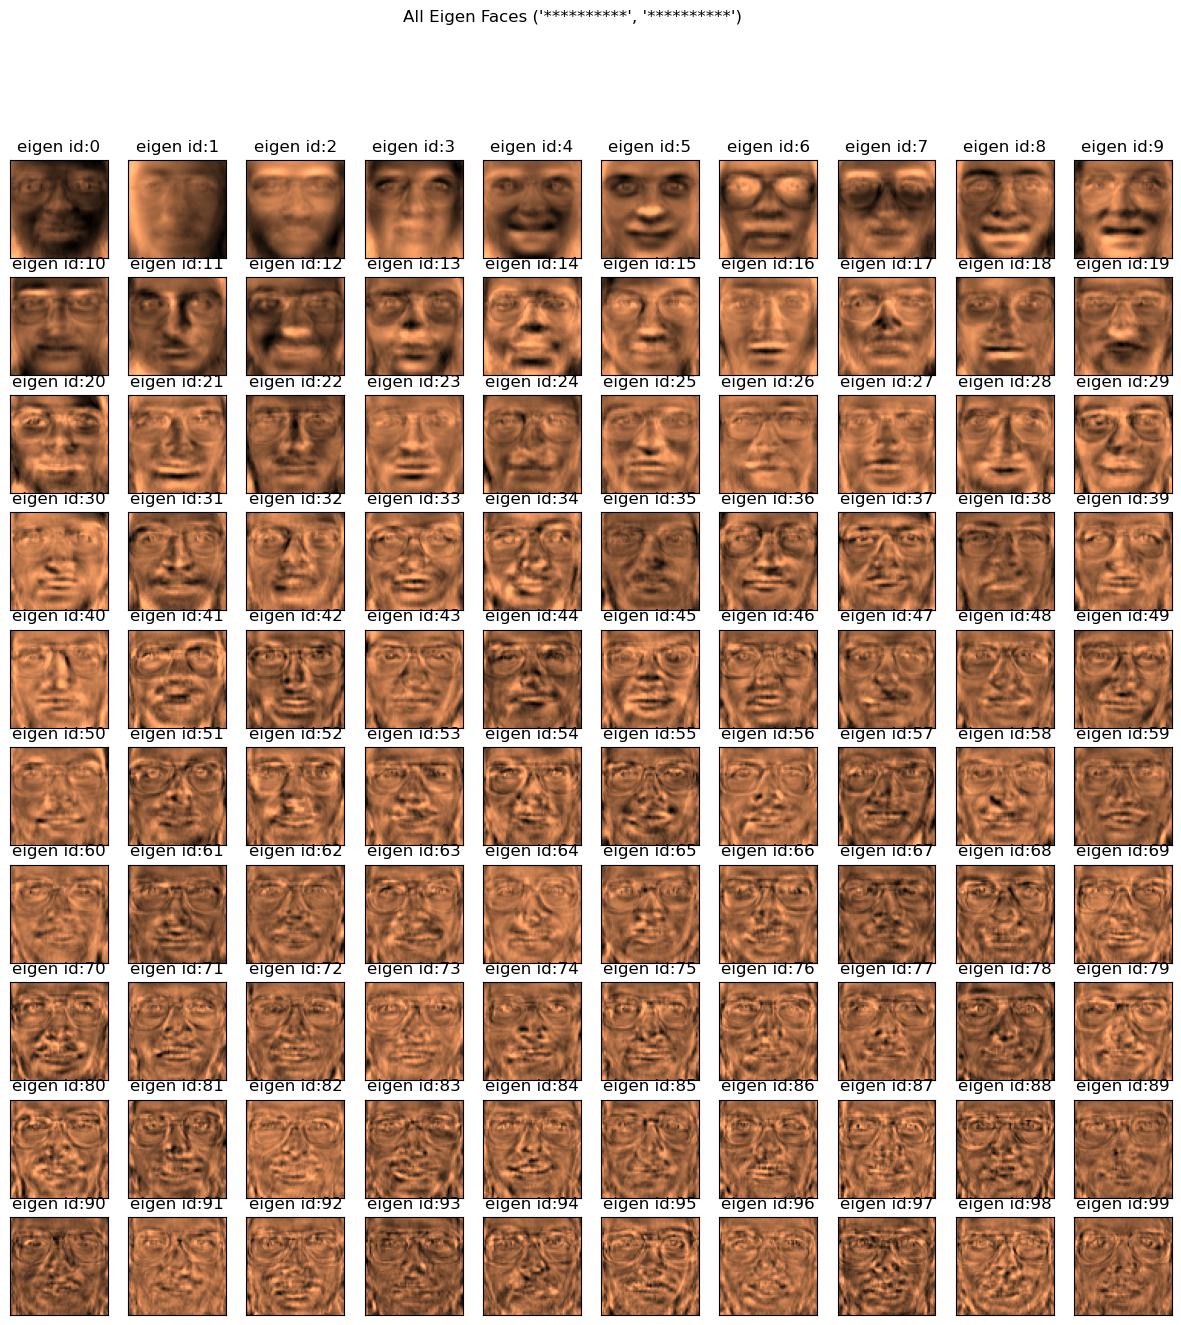

In [125]:
#get Eigen Faces
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data_np.shape[1], data_np.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="copper")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title(f"eigen id:{i}")
plt.suptitle(f'All Eigen Faces {10*"*", 10*"*"}')

In [126]:
X_pca_train_=pca.transform(X_train)
X_pca_test_=pca.transform(X_test)

In [127]:
clf = SVC()
clf.fit(X_pca_train_, y_train)
y_pred = clf.predict(X_pca_test_)
print(f"accuracy score:{metrics.accuracy_score(y_test, y_pred):.2f}")

accuracy score:0.92


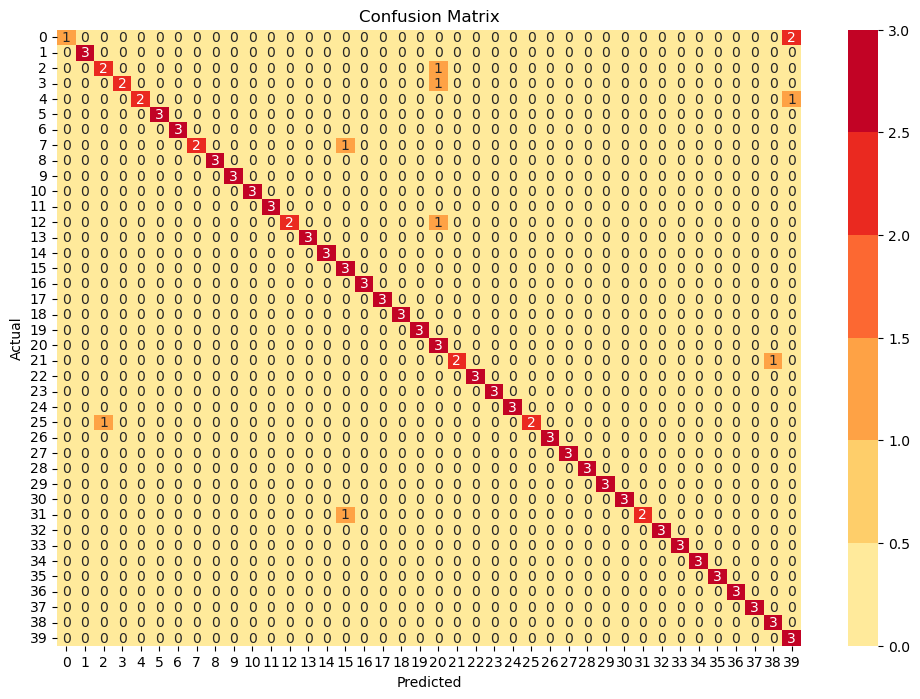

In [129]:
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Choose a different colormap (for example, 'YlOrRd' which is Yellow-Orange-Red)
custom_cmap = sns.color_palette("YlOrRd")

# Create the heatmap with the custom colormap
plt.figure(1, figsize=(12, 8))
sns.heatmap(confusion_matrix, cmap=custom_cmap, annot=True, fmt='d', cbar=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [132]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [138]:
#getting accuracy score for different models
model= LinearDiscriminantAnalysis()
model.fit(X_pca_train_, y_train)
y_pred=model.predict(X_pca_test_)
print(10*"=",f'{"LD".upper(),10*"="} Result')
print(f"Accuracy score:{metrics.accuracy_score(y_test, y_pred):0.2f}")
 

========== ('LD', '==========') Result
Accuracy score:0.93


In [139]:
model= LogisticRegression()
model.fit(X_pca_train_, y_train)
y_pred=model.predict(X_pca_test_)
print(10*"=",f'{"LR".upper(),10*"="} Result')
print(f"Accuracy score:{metrics.accuracy_score(y_test, y_pred):0.2f}")
 

========== ('LR', '==========') Result
Accuracy score:0.93


In [140]:
model= GaussianNB()
model.fit(X_pca_train_, y_train)
y_pred=model.predict(X_pca_test_)
print(10*"=",f'{"NB".upper(),10*"="} Result')
print(f"Accuracy score:{metrics.accuracy_score(y_test, y_pred):0.2f}")
 

========== ('NB', '==========') Result
Accuracy score:0.87


In [141]:
model= KNeighborsClassifier(n_neighbors=5)
model.fit(X_pca_train_, y_train)
y_pred=model.predict(X_pca_test_)
print(10*"=",f'{"KNN".upper(),10*"="} Result')
print(f"Accuracy score:{metrics.accuracy_score(y_test, y_pred):0.2f}")
 

========== ('KNN', '==========') Result
Accuracy score:0.68


In [143]:
model= SVC()
model.fit(X_pca_train_, y_train)
y_pred=model.predict(X_pca_test_)
print(10*"=",f'{"SVM".upper(),10*"="} Result')
print(f"Accuracy score:{metrics.accuracy_score(y_test, y_pred):0.2f}")
 

========== ('SVM', '==========') Result
Accuracy score:0.92


# The Leave One Out Cross-validation

In [160]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)
 

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target_np, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))


LDA mean cross validations score:0.97
LR mean cross validations score:0.94
NB mean cross validations score:0.78
KNN mean cross validations score:0.68
DT mean cross validations score:0.48
SVM mean cross validations score:0.87


In [164]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Specify the number of folds (k)
k = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create a logistic regression model
clf = LogisticRegression()

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_pca, target_np, cv=kf)

# Calculate the mean accuracy
mean_accuracy = cv_scores.mean()

# Print the mean accuracy score
print("Logistic Regression {}-fold cross-validation mean accuracy score: {:.2f}".format(k, mean_accuracy))


Logistic Regression 5-fold cross-validation mean accuracy score: 0.93


In [165]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target_np,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))


LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.98


In [166]:
#Leave One Out vross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target_np,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.95


In [169]:
#getting Lr score
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_pca_train_, y_train)
print("lr score:{:.2f}".format(lr.score(X_pca_test_, y_test)))

lr score:0.93


#  Precision-Recall-ROC

In [170]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

target_l=label_binarize(target_np, classes=range(40))
print(target_l.shape)
print(target_l[0])

n_classes=target_l.shape[1]

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [171]:
X_train_ , X_test_, y_train_, y_test_=train_test_split(X,target_l,test_size=0.3,stratify=target_l,random_state=0)

In [172]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_)

X_train_pca=pca.transform(X_train_)
X_test_pca=pca.transform(X_test_)

In [173]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_pca, y_train_)
y_score=oneRestClassifier.decision_function(X_test_pca)

In [174]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97
